In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import sys,random

%load_ext autoreload
%autoreload 2

sys.path.append('..')
from util import provas,load_padr,score_inep, notas_sisu, params_inep,load_acertos,load_sample


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
missing_values = {'TP_COR_RACA':[0,6],'TP_ESTADO_CIVIL':[0],'TP_ANO_CONCLUIU':[0],
                  'TP_ESCOLA':[1],
                 'Q001':['H'],'Q002':['H'],'Q003':['F'],'Q004':['F']}

In [4]:
df = load_sample(2019,10000,orig=False)


In [5]:
na = {}
missing = {}
for col in df.columns:
    #print(col,f"NA: {df[col].isna().sum()}")
    na[col] =  df[col].isna().sum()
    if col in missing_values.keys():
        missing[col] = df[col].isin(missing_values[col]).sum()
        #print(col, f"Missing: {missing}")
pd.DataFrame([na, missing],index=['NA','missing']).sort_values(['NA','missing'],axis=1,ascending=False).T[:20]/len(df)

,NA,missing
CO_MUNICIPIO_ESC,0.7020,NaN
NO_MUNICIPIO_ESC,0.7020,NaN
CO_UF_ESC,0.7020,NaN
SG_UF_ESC,0.7020,NaN
TP_DEPENDENCIA_ADM_ESC,0.7020,NaN
TP_LOCALIZACAO_ESC,0.7020,NaN
TP_SIT_FUNC_ESC,0.7020,NaN
TP_ENSINO,0.3345,NaN
TP_ESCOLA,0.0000,0.6169
TP_ANO_CONCLUIU,0.0000,0.4053


<Axes: xlabel='TP_ESCOLA', ylabel='count'>

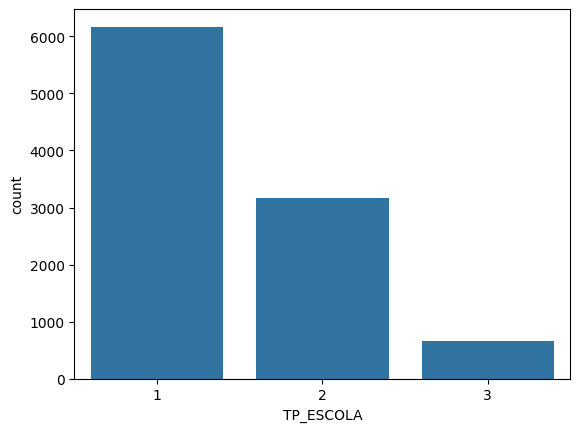

In [6]:
sns.countplot(df,x='TP_ESCOLA')

<Axes: xlabel='NU_NOTA_MT', ylabel='Density'>

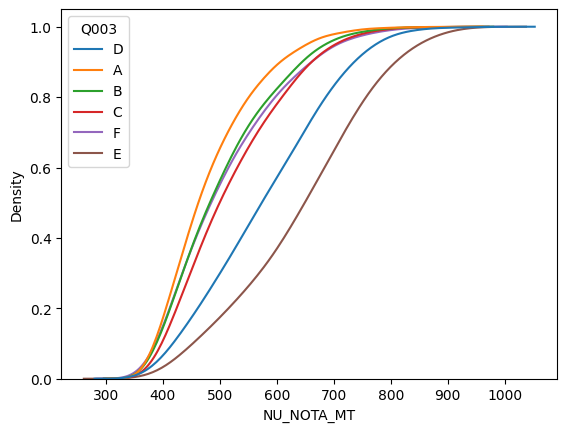

In [9]:
sns.kdeplot(df,x="NU_NOTA_MT",hue='Q003',cumulative=True,multiple='layer',common_norm=False)